## Dependencias 

In [44]:
import numpy as np 
import pandas as pd 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.feature_selection import SelectKBest
from varclushi import VarClusHi
from functools import reduce 

from CreditScoringToolkit import DiscreteNormalizer,frequency_table
pd.set_option('display.max_columns',None)

## Lectura de datos 

In [3]:
data = pd.read_csv('../../data/acc.csv',dtype=str)
data.shape

(2260701, 151)

In [4]:
# Rename variables according to provided mapping
rename_dict = {
    'loan_amnt': 'c_loan_amnt',
    'grade': 'd_grade',
    'sub_grade': 'd_sub_grade',
    'emp_length': 'd_emp_length',
    'home_ownership': 'd_home_ownership',
    'annual_inc': 'c_annual_inc',
    'purpose': 'd_purpose',
    'addr_state': 'd_addr_state',
    'dti': 'c_dti',
    'delinq_2yrs': 'c_delinq_2yrs',
    'fico_range_low': 'c_fico_range_low',
    'fico_range_high': 'c_fico_range_high',
    'inq_last_6mths': 'c_inq_last_6mths',
    'mths_since_last_delinq': 'c_mths_since_last_delinq',
    'mths_since_last_record': 'c_mths_since_last_record',
    'open_acc': 'c_open_acc',
    'pub_rec': 'c_pub_rec',
    'revol_bal': 'c_revol_bal',
    'revol_util': 'c_revol_util',
    'total_acc': 'c_total_acc',
    'application_type': 'd_application_type',
    'acc_now_delinq': 'c_acc_now_delinq',
    'tot_coll_amt': 'c_tot_coll_amt',
    'tot_cur_bal': 'c_tot_cur_bal',
    'open_acc_6m': 'c_open_acc_6m',
    'open_act_il': 'c_open_act_il',
    'open_il_12m': 'c_open_il_12m',
    'open_il_24m': 'c_open_il_24m',
    'mths_since_rcnt_il': 'c_mths_since_rcnt_il',
    'total_bal_il': 'c_total_bal_il',
    'il_util': 'c_il_util',
    'open_rv_12m': 'c_open_rv_12m',
    'open_rv_24m': 'c_open_rv_24m',
    'max_bal_bc': 'c_max_bal_bc',
    'all_util': 'c_all_util',
    'total_rev_hi_lim': 'c_total_rev_hi_lim',
    'inq_fi': 'c_inq_fi',
    'total_cu_tl': 'c_total_cu_tl',
    'inq_last_12m': 'c_inq_last_12m',
    'acc_open_past_24mths': 'c_acc_open_past_24mths',
    'avg_cur_bal': 'c_avg_cur_bal',
    'bc_open_to_buy': 'c_bc_open_to_buy',
    'bc_util': 'c_bc_util',
    'chargeoff_within_12_mths': 'c_chargeoff_within_12_mths',
    'delinq_amnt': 'c_delinq_amnt',
    'mo_sin_old_il_acct': 'c_mo_sin_old_il_acct',
    'mo_sin_old_rev_tl_op': 'c_mo_sin_old_rev_tl_op',
    'mo_sin_rcnt_rev_tl_op': 'c_mo_sin_rcnt_rev_tl_op',
    'mo_sin_rcnt_tl': 'c_mo_sin_rcnt_tl',
    'mort_acc': 'c_mort_acc',
    'mths_since_recent_bc': 'c_mths_since_recent_bc',
    'mths_since_recent_bc_dlq': 'c_mths_since_recent_bc_dlq',
    'mths_since_recent_inq': 'c_mths_since_recent_inq',
    'mths_since_recent_revol_delinq': 'c_mths_since_recent_revol_delinq',
    'num_accts_ever_120_pd': 'c_num_accts_ever_120_pd',
    'num_actv_bc_tl': 'c_num_actv_bc_tl',
    'num_actv_rev_tl': 'c_num_actv_rev_tl',
    'num_bc_sats': 'c_num_bc_sats',
    'num_bc_tl': 'c_num_bc_tl',
    'num_il_tl': 'c_num_il_tl',
    'num_op_rev_tl': 'c_num_op_rev_tl',
    'num_rev_accts': 'c_num_rev_accts',
    'num_rev_tl_bal_gt_0': 'c_num_rev_tl_bal_gt_0',
    'num_sats': 'c_num_sats',
    'num_tl_120dpd_2m': 'c_num_tl_120dpd_2m',
    'num_tl_30dpd': 'c_num_tl_30dpd',
    'num_tl_90g_dpd_24m': 'c_num_tl_90g_dpd_24m',
    'num_tl_op_past_12m': 'c_num_tl_op_past_12m',
    'pct_tl_nvr_dlq': 'c_pct_tl_nvr_dlq',
    'percent_bc_gt_75': 'c_percent_bc_gt_75',
    'pub_rec_bankruptcies': 'c_pub_rec_bankruptcies',
    'tax_liens': 'c_tax_liens',
    'tot_hi_cred_lim': 'c_tot_hi_cred_lim',
    'total_bal_ex_mort': 'c_total_bal_ex_mort',
    'total_bc_limit': 'c_total_bc_limit',
    'total_il_high_credit_limit': 'c_total_il_high_credit_limit',
    'disbursement_method': 'd_disbursement_method',
}

data.rename(columns=rename_dict, inplace=True)


In [5]:
data['loan_status'].value_counts()

loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64

In [6]:
data = data.loc[data['loan_status'].isin(['Fully Paid','Current','Charged Off','Late (31-120 days)'])].reset_index(drop=True)
data['target'] = 1-data['loan_status'].isin(['Fully Paid','Current'])

In [7]:
data.sample(2)

,id,member_id,c_loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,d_grade,d_sub_grade,emp_title,d_emp_length,d_home_ownership,c_annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,d_purpose,title,zip_code,d_addr_state,c_dti,c_delinq_2yrs,earliest_cr_line,c_fico_range_low,c_fico_range_high,c_inq_last_6mths,c_mths_since_last_delinq,c_mths_since_last_record,c_open_acc,c_pub_rec,c_revol_bal,c_revol_util,c_total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,d_application_type,annual_inc_joint,dti_joint,verification_status_joint,c_acc_now_delinq,c_tot_coll_amt,c_tot_cur_bal,c_open_acc_6m,c_open_act_il,c_open_il_12m,c_open_il_24m,c_mths_since_rcnt_il,c_total_bal_il,c_il_util,c_open_rv_12m,c_open_rv_24m,c_max_bal_bc,c_all_util,c_total_rev_hi_lim,c_inq_fi,c_total_cu_tl,c_inq_last_12m,c_acc_open_past_24mths,c_avg_cur_bal,c_bc_open_to_buy,c_bc_util,c_chargeoff_within_12_mths,c_delinq_amnt,c_mo_sin_old_il_acct,c_mo_sin_old_rev_tl_op,c_mo_sin_rcnt_rev_tl_op,c_mo_sin_rcnt_tl,c_mort_acc,c_mths_since_recent_bc,c_mths_since_recent_bc_dlq,c_mths_since_recent_inq,c_mths_since_recent_revol_delinq,c_num_accts_ever_120_pd,c_num_actv_bc_tl,c_num_actv_rev_tl,c_num_bc_sats,c_num_bc_tl,c_num_il_tl,c_num_op_rev_tl,c_num_rev_accts,c_num_rev_tl_bal_gt_0,c_num_sats,c_num_tl_120dpd_2m,c_num_tl_30dpd,c_num_tl_90g_dpd_24m,c_num_tl_op_past_12m,c_pct_tl_nvr_dlq,c_percent_bc_gt_75,c_pub_rec_bankruptcies,c_tax_liens,c_tot_hi_cred_lim,c_total_bal_ex_mort,c_total_bc_limit,c_total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,d_disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,target
1258295,17724136,NaN,15000.0,15000.0,15000.0,36 months,6.49,459.67,A,A2,Midwest Regional Sales Magr,4 years,RENT,84000.0,Not Verified,Jun-2014,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,460xx,IN,15.4,0.0,Sep-1997,700.0,704.0,0.0,38.0,NaN,7.0,0.0,14784.0,56.2,26.0,w,0.0,0.0,16244.85,16244.85,15000.0,1244.85,0.0,0.0,0.0,Jun-2016,3665.84,NaN,Mar-2019,699.0,695.0,0.0,38.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,40180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26300.0,NaN,NaN,NaN,4.0,5740.0,4069.0,59.3,0.0,0.0,176.0,200.0,10.0,10.0,3.0,10.0,60.0,10.0,38.0,1.0,2.0,4.0,3.0,9.0,9.0,5.0,14.0,4.0,7.0,0.0,0.0,0.0,2.0,84.6,0.0,0.0,0.0,64013.0,40180.0,10000.0,37713.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
1541422,133158513,NaN,16000.0,16000.0,16000.0,36 months,7.46,497.41,A,A4,License Electrician,7 years,RENT,70000.0,Source Verified,May-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,070xx,NJ,33.35,0.0,Sep-2010,745.0,749.0,0.0,NaN,NaN,13.0,0.0,6182.0,19.6,18.0,w,11907.37,11907.37,4941.61,4941.61,4092.63,848.98,0.0,0.0,0.0,Mar-2019,497.41,Apr-2019,Mar-2019,784.0,780.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,58513.0,1.0,6.0,1.0,3.0,11.0,52331.0,64.0,3.0,3.0,1845.0,51.0,31600.0,1.0,0.0,3

## Clasificación de variables 

In [8]:
um = ['id']
varc = [v for v in data.columns if v[:2]=='c_']
vard = [v for v in data.columns if v[:2]=='d_']
vart = ['target']
len(varc),len(vard)

(69, 8)

## Partición 

In [9]:
data = data[um+vart+varc+vard]

In [10]:
data.head()

,id,target,c_loan_amnt,c_annual_inc,c_dti,c_delinq_2yrs,c_fico_range_low,c_fico_range_high,c_inq_last_6mths,c_mths_since_last_delinq,c_mths_since_last_record,c_open_acc,c_pub_rec,c_revol_bal,c_revol_util,c_total_acc,c_acc_now_delinq,c_tot_coll_amt,c_tot_cur_bal,c_open_acc_6m,c_open_act_il,c_open_il_12m,c_open_il_24m,c_mths_since_rcnt_il,c_total_bal_il,c_il_util,c_open_rv_12m,c_open_rv_24m,c_max_bal_bc,c_all_util,c_total_rev_hi_lim,c_inq_fi,c_total_cu_tl,c_inq_last_12m,c_acc_open_past_24mths,c_avg_cur_bal,c_bc_open_to_buy,c_bc_util,c_chargeoff_within_12_mths,c_delinq_amnt,c_mo_sin_old_il_acct,c_mo_sin_old_rev_tl_op,c_mo_sin_rcnt_rev_tl_op,c_mo_sin_rcnt_tl,c_mort_acc,c_mths_since_recent_bc,c_mths_since_recent_bc_dlq,c_mths_since_recent_inq,c_mths_since_recent_revol_delinq,c_num_accts_ever_120_pd,c_num_actv_bc_tl,c_num_actv_rev_tl,c_num_bc_sats,c_num_bc_tl,c_num_il_tl,c_num_op_rev_tl,c_num_rev_accts,c_num_rev_tl_bal_gt_0,c_num_sats,c_num_tl_120dpd_2m,c_num_tl_30dpd,c_num_tl_90g_dpd_24m,c_num_tl_op_past_12m,c_pct_tl_nvr_dlq,c_percent_bc_gt_75,c_pub_rec_bankruptcies,c_tax_liens,c_tot_hi_cred_lim,c_total_bal_ex_mort,c_total_bc_limit,c_total_il_high_credit_limit,d_grade,d_sub_grade,d_emp_length,d_home_ownership,d_purpose,d_addr_state,d_application_type,d_disbursement_method
0,68407277,0,3600.0,55000.0,5.91,0.0,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,C,C4,10+ years,MORTGAGE,debt_consolidation,PA,Individual,Cash
1,68355089,0,24700.0,65000.0,16.06,1.0,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,C,C1,10+ years,MORTGAGE,small_business,SD,Individual,Cash
2,68341763,0,20000.0,63000.0,10.78,0.0,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,NaN,10.0,NaN,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,B,B4,10+ years,MORTGAGE,home_improvement,IL,Joint App,Cash
3,66310712,0,35000.0,110000.0,17.06,0.0,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,0.0,0.0,301500.0,1.0,1.0,0.0,1.0,23.0,12609.0,70.0,1.0,1.0,6987.0,45.0,67300.0,0.0,1.0,0.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,NaN,NaN,NaN,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,C,C5,10+ years,MORTGAGE,debt_consolidation,NJ,Individual,Cash
4,68476807,0,10400.0,104433.0,25.37,1.0,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,12.0,1.0,12.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,F,F1,3 years,MORTGAGE,major_purchase,PA,Individual,Cash


In [11]:
for v in vard:
    data[v] = data[v].fillna('MISSING')
for v in varc:
    data[v] = pd.to_numeric(data[v],errors='coerce')

In [12]:
train,valid = train_test_split(data,test_size=0.3)
train.reset_index(drop=True,inplace=True)
valid.reset_index(drop=True,inplace=True)
train.shape,valid.shape

((1571565, 79), (673529, 79))

## Análisis Exploratorio de Datos 

### Ausentes 

In [13]:
miss = ((train[varc].isna().sum())/len(train)).sort_values(ascending=False)
fuera = list(miss[miss>0.3].index)
print(len(fuera))
varc = [v for v in varc if v not in fuera]
train.drop(fuera,axis=1,inplace=True)

18


### Multicolinealidad

In [14]:
im = SimpleImputer(strategy='median')
Xi = pd.DataFrame(im.fit_transform(train[varc]),columns=varc)

In [17]:
vc = VarClusHi(df=Xi.sample(frac=0.01),feat_list=varc).varclus().rsquare

In [18]:
mc = list(vc.sort_values(by=['Cluster','RS_Ratio']).groupby('Cluster').first()['Variable'])

In [19]:
im = SimpleImputer(strategy='median')
im.fit(train[mc])

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


### Normalización de variables discretas

In [22]:
frequency_table(train,vard)

**** Frequency Table for d_grade ****

         Abs. Freq.  Rel. Freq.  Cum. Abs. Freq.  Cum. Rel. Freq.
d_grade                                                          
A            302305    0.192359           302305         0.192359
B            461812    0.293855           764117         0.486214
C            452268    0.287782          1216385         0.773996
D            224373    0.142770          1440758         0.916766
E             93837    0.059709          1534595         0.976476
F             28657    0.018235          1563252         0.994710
G              8313    0.005290          1571565         1.000000




**** Frequency Table for d_sub_grade ****

             Abs. Freq.  Rel. Freq.  Cum. Abs. Freq.  Cum. Rel. Freq.
d_sub_grade                                                          
A1                60798    0.038686            60798         0.038686
A2                48514    0.030870           109312         0.069556
A3                50993    0.032447     

In [23]:
dn = DiscreteNormalizer(normalization_threshold=0.1)
dn.fit(train[vard])

In [24]:
varn = [f'n_{v}' for v in vard]
train[varn] = dn.transform(train[vard])

In [25]:
frequency_table(train,varn)

**** Frequency Table for n_d_grade ****

           Abs. Freq.  Rel. Freq.  Cum. Abs. Freq.  Cum. Rel. Freq.
n_d_grade                                                          
A              302305    0.192359           302305         0.192359
B              592619    0.377088           894924         0.569448
C              452268    0.287782          1347192         0.857230
D              224373    0.142770          1571565         1.000000




**** Frequency Table for n_d_sub_grade ****

               Abs. Freq.  Rel. Freq.  Cum. Abs. Freq.  Cum. Rel. Freq.
n_d_sub_grade                                                          
OTHER             1571565         1.0          1571565              1.0




**** Frequency Table for n_d_emp_length ****

                Abs. Freq.  Rel. Freq.  Cum. Abs. Freq.  Cum. Rel. Freq.
n_d_emp_length                                                          
10+ years           520061    0.330919           520061         0.330919
OTHER            

In [26]:
unarias = [v[2:] for v in varn if train[v].nunique()==1]
unarias


['d_sub_grade', 'd_application_type', 'd_disbursement_method']

In [27]:
vard = [v for v in vard if v not in unarias]
train.drop(unarias,axis=1,inplace=True)
dn.fit(train[vard])

In [28]:
train.drop(varn,axis=1,inplace=True)
varn = [f'n_{v}' for v in vard]
train[varn] = dn.transform(train[vard])

In [29]:
frequency_table(train,varn)


**** Frequency Table for n_d_grade ****

           Abs. Freq.  Rel. Freq.  Cum. Abs. Freq.  Cum. Rel. Freq.
n_d_grade                                                          
A              302305    0.192359           302305         0.192359
B              592619    0.377088           894924         0.569448
C              452268    0.287782          1347192         0.857230
D              224373    0.142770          1571565         1.000000




**** Frequency Table for n_d_emp_length ****

                Abs. Freq.  Rel. Freq.  Cum. Abs. Freq.  Cum. Rel. Freq.
n_d_emp_length                                                          
10+ years           520061    0.330919           520061         0.330919
OTHER              1051504    0.669081          1571565         1.000000




**** Frequency Table for n_d_home_ownership ****

                    Abs. Freq.  Rel. Freq.  Cum. Abs. Freq.  Cum. Rel. Freq.
n_d_home_ownership                                                          
M

### Matriz de predictoras $\mathcal{X}$

In [30]:
oh = OneHotEncoder(drop='if_binary',sparse_output=False)
oh.fit(train[varn])
varoh = list(oh.get_feature_names_out())
varoh

['n_d_grade_A',
 'n_d_grade_B',
 'n_d_grade_C',
 'n_d_grade_D',
 'n_d_emp_length_OTHER',
 'n_d_home_ownership_MORTGAGE',
 'n_d_home_ownership_OWN',
 'n_d_home_ownership_RENT',
 'n_d_purpose_OTHER',
 'n_d_purpose_credit_card',
 'n_d_purpose_debt_consolidation',
 'n_d_addr_state_OTHER']

In [45]:
X = train[mc].copy()
X[varoh] = oh.transform(train[varn])
X.head()
im = SimpleImputer(strategy='median')
im.fit(X)
X = pd.DataFrame(im.transform(X),columns=X.columns)
sc = MinMaxScaler()
X = pd.DataFrame(sc.fit_transform(X),columns=X.columns)

### Vector respuesta $\vec{y}$

In [47]:
y = train[vart[0]]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

## Aprendizaje 

In [48]:
var = mc+varoh

### Predictoras más fuertes 

In [49]:
sk = SelectKBest(k=len(var))
sk.fit(X,y)

,score_func,<function f_c...t 0x1164c4860>
,k,27


<Axes: >

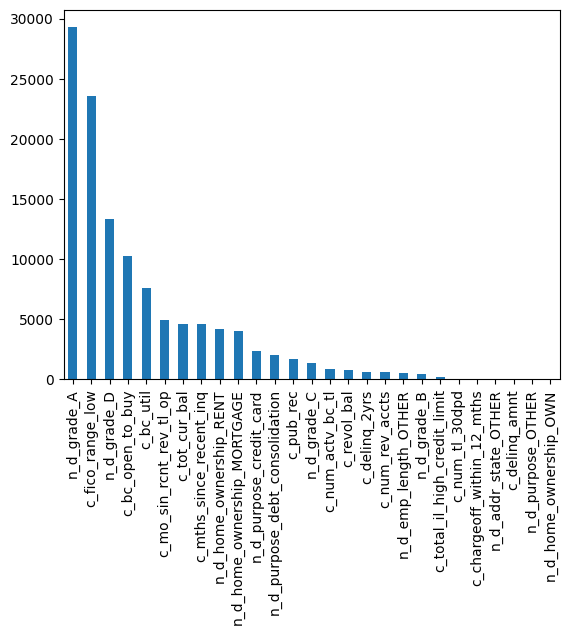

In [50]:
pd.Series(dict(zip(var,sk.scores_))).sort_values(ascending=False).plot(kind='bar')

In [51]:
k = 10
sk = SelectKBest(k=k)
sk.fit(X,y)

,score_func,<function f_c...t 0x1164c4860>
,k,10


In [52]:
best = [v for v,s in zip(var,sk.get_support()) if s]
best

['c_tot_cur_bal',
 'c_fico_range_low',
 'c_mo_sin_rcnt_rev_tl_op',
 'c_bc_util',
 'c_mths_since_recent_inq',
 'c_bc_open_to_buy',
 'n_d_grade_A',
 'n_d_grade_D',
 'n_d_home_ownership_MORTGAGE',
 'n_d_home_ownership_RENT']

In [54]:
X = train[mc+vard].copy()
X[varn] = dn.transform(X[vard])
X[varoh] = oh.transform(train[varn])
X.head()
im = SimpleImputer(strategy='median')
im.fit(X[best])
X = pd.DataFrame(im.transform(sc.fit_transform(X[best])),columns=best)


/Users/gus/Library/Mobile Documents/com~apple~CloudDocs/trabajo_gus/anahuac/didactic-octo-telegram/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


### Híper-parametrización

In [55]:
hparam_grid = {
    'hidden_layer_sizes': [(a,b,c,) for a in range(2,10) for b in range(2,10) for c in range(2,10)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': np.logspace(-5, -1, 5),
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 500, 1000],
    'batch_size': [16, 32, 64]
}


In [56]:
reduce(lambda x,y: x*y, map(len,hparam_grid.values()))

276480

In [57]:
ann = MLPClassifier()

In [58]:
grid = RandomizedSearchCV(
    estimator=ann,
    param_distributions=hparam_grid,
    scoring='roc_auc',
    n_jobs=-1,
    cv=5,
    n_iter=1,
    verbose=True,
)

In [59]:
grid.fit(X,y)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


,estimator,MLPClassifier()
,param_distributions,"{'activation': ['relu', 'tanh', ...], 'alpha': array([1.e-05...e-02, 1.e-01]), 'batch_size': [16, 32, ...], 'hidden_layer_sizes': [(2, ...), (2, ...), ...], ...}"
,n_iter,1
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [60]:
grid.best_score_

np.float64(0.6405351823538802)

In [62]:
ann = grid.best_estimator_
ann

,hidden_layer_sizes,"(2, ...)"
,activation,'tanh'
,solver,'adam'
,alpha,np.float64(0.01)
,batch_size,16
,learning_rate,'adaptive'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,None


### Aprendizaje final $\vec{y} = f (\mathcal{X};\theta)$  (Ahora si vamos a aprender el modelo)

In [63]:
ann.fit(X,y)

,hidden_layer_sizes,"(2, ...)"
,activation,'tanh'
,solver,'adam'
,alpha,np.float64(0.01)
,batch_size,16
,learning_rate,'adaptive'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,None


## Generalización del modelo (qué tan bien se comporta en datos que nunca vió, es importante aplicar TODAS las transfromaciones previas)

In [64]:
Xv = valid[mc+vard].copy()
Xv[varn] = dn.transform(Xv[vard])
Xv[varoh] = oh.transform(Xv[varn])
Xv = pd.DataFrame(im.transform(sc.transform(Xv[best])),columns=best)

/Users/gus/Library/Mobile Documents/com~apple~CloudDocs/trabajo_gus/anahuac/didactic-octo-telegram/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


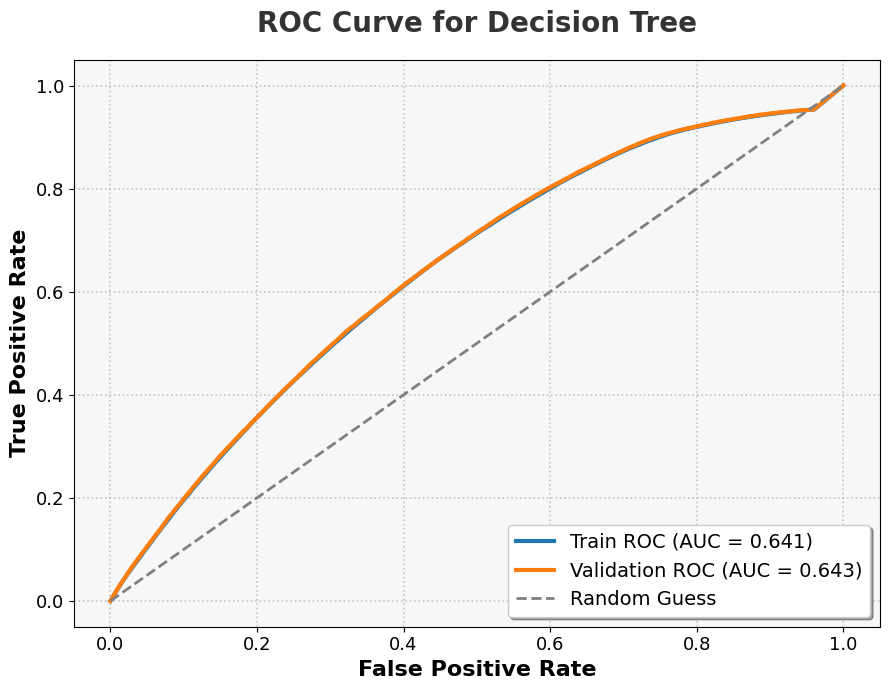

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Training ROC and AUC
y_train_proba = ann.predict_proba(X)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y, y_train_proba)
auc_train = auc(fpr_train, tpr_train)

# Validation ROC and AUC
y_valid = valid[vart[0]]
y_valid_proba = ann.predict_proba(Xv)[:, 1]
fpr_valid, tpr_valid, _ = roc_curve(y_valid, y_valid_proba)
auc_valid = auc(fpr_valid, tpr_valid)

plt.figure(figsize=(9, 7))
plt.plot(fpr_train, tpr_train, color='#1f77b4', lw=3, label=f'Train ROC (AUC = {auc_train:.3f})')
plt.plot(fpr_valid, tpr_valid, color='#ff7f0e', lw=3, label=f'Validation ROC (AUC = {auc_valid:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guess')

plt.title('ROC Curve for Decision Tree', fontsize=20, fontweight='bold', color='#333333', pad=20)
plt.xlabel('False Positive Rate', fontsize=16, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=16, fontweight='bold')
plt.legend(fontsize=14, loc='lower right', frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle=':', linewidth=1.2, alpha=0.7)
plt.gca().set_facecolor('#f7f7f7')
plt.tick_params(axis='both', which='major', labelsize=13)
plt.tight_layout()
plt.show()

## Uso del modelo 

In [78]:

# Get predicted probabilities for train and valid sets
train_proba = ann.predict_proba(X)[:, 1]
valid_proba = ann.predict_proba(Xv)[:, 1]

# Use pd.qcut for 5 natural bins (quantiles) independently for train and valid
labels = [f'bin_{i+1}' for i in range(5)]

train_range = pd.cut(train_proba, bins=5, labels=labels, duplicates='drop')
valid_range = pd.cut(valid_proba, bins=5, labels=labels, duplicates='drop')

# Build DataFrames for train and valid
df_train_nodes = pd.DataFrame({
    'target': y.values,
    'prob_range': train_range,
    'sample': 'train'
})

df_valid_nodes = pd.DataFrame({
    'target': y_valid.values,
    'prob_range': valid_range,
    'sample': 'valid'
})

# Concatenate into a single DataFrame
df_nodes = pd.concat([df_train_nodes, df_valid_nodes], ignore_index=True)

# Show the first few rows
df_nodes.head()



,target,prob_range,sample
0,0,bin_2,train
1,0,bin_2,train
2,0,bin_2,train
3,0,bin_2,train
4,0,bin_1,train


In [79]:
df_nodes.assign(n=1).groupby(list(df_nodes.columns)).count().to_clipboard()

/var/folders/b2/142kycp96wdg69k6pkw9_vf00000gp/T/ipykernel_6444/1880289451.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_nodes.assign(n=1).groupby(list(df_nodes.columns)).count().to_clipboard()
